In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from datetime import datetime
import psutil


In [2]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
print(f"{datetime.now()} - Libraries imported successfully.")


2024-06-17 22:39:11.685142 - Libraries imported successfully.


In [4]:
# Load the dataset
leads_df = pd.read_csv('Leads.csv')
print(f"{datetime.now()} - Dataset loaded successfully.")
print(leads_df.head())


2024-06-17 22:39:11.750001 - Dataset loaded successfully.
                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Pa

In [5]:
# checking values in the dataset
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Checking the dimensions of the dataframe
leads_df.shape

(9240, 37)

In [7]:
# checking the statistical aspects
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Checking the column values
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
# Check the info to see the types of the feature variables and the null values present

leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
leads_df.isnull().sum().sort_values(ascending=0)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [11]:
# Drop all the columns in which greater than 3000 missing values are present

for col in leads_df.columns:
    if leads_df[col].isnull().sum() > 3000:
        leads_df.drop(col, axis=1, inplace=True)


In [12]:
# checking again
leads_df.isnull().sum().sort_values(ascending=0)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [13]:
# Dropping City and Country

leads_df.drop(['City','Country'], axis=1, inplace = True)

In [14]:
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [15]:
for col in leads_df.columns:
    print(leads_df[col].value_counts())

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search

In [16]:
# checking again for highest columns with select value, applying value counts on lead profile
print(leads_df['Lead Profile'].value_counts())

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64


In [17]:
# Checking again for How did you hear about X Education
print(leads_df['How did you hear about X Education'].value_counts())

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64


In [18]:
# Checking again for Specialization
print(leads_df['Specialization'].value_counts())

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64


In [19]:
# Dropping the two columns Lead Profile and HOw did you hear about X education
leads_df.drop(['Lead Profile','How did you hear about X Education'], axis=1, inplace = True)

In [20]:
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [21]:
# dropping the other list of columns with large numbers only dominated by a single value
leads_df.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis=1, inplace = True)

In [22]:
# Checking value count on what matters most to you in choosing a course
print(leads_df['What matters most to you in choosing a course'].value_counts())

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64


In [23]:
# Droppign this column
leads_df.drop(['What matters most to you in choosing a course'], axis=1, inplace = True)

In [24]:
# Checkign null values again
leads_df.isnull().sum().sort_values(ascending=0)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [25]:
# Dropping the leads that have nulls in What is your current occupation
leads_df = leads_df[~pd.isnull(leads_df['What is your current occupation'])]

In [26]:
#Checking nulls again
leads_df.isnull().sum().sort_values(ascending=0)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [27]:
# Dropping nulls in the column 'TotalVisits'
leads_df = leads_df[~pd.isnull(leads_df['TotalVisits'])]

In [28]:
leads_df.isnull().sum().sort_values(ascending=0)

Lead Source                               29
Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [29]:
# Dropping nulls in the column 'Lead Source'
leads_df = leads_df[~pd.isnull(leads_df['Lead Source'])]

In [30]:
#checking nulls again
leads_df.isnull().sum().sort_values(ascending=0)

Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [31]:
# Dropping nulls in specialization
leads_df = leads_df[~pd.isnull(leads_df['Specialization'])]

In [32]:
#checking nulls again
leads_df.isnull().sum().sort_values(ascending=0)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

### Checking the number of rows retained now that we've removed all null values

In [33]:
print(len(leads_df.index)/9240)

0.6897186147186147


### 69% of rows retained

In [34]:
#Looking at the dataset again
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [35]:
# Dropping prospect id and lead number from the analysis
leads_df.drop(['Prospect ID','Lead Number'], axis=1, inplace = True)

In [36]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


## Dummy variable creation


In [37]:
# Check the columns which are of type 'object'

temp = leads_df.loc[ : , leads_df.dtypes == "object" ]
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [38]:
dummy = pd.get_dummies(leads_df[[
    'Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
    'What is your current occupation',
    'A free copy of Mastering The Interview', 'Last Notable Activity']],dtype='int',drop_first=True)

# Add the results to the master dataframe
leads_df = pd.concat([leads_df, dummy], axis=1)

In [39]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' 

dummy_spl = pd.get_dummies(leads_df['Specialization'], prefix = 'Specialization',dtype='int')
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
leads_df = pd.concat([leads_df, dummy_spl], axis = 1)

In [40]:
# Drop the variables for which the dummy variables have been created

leads_df = leads_df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [41]:
#taking a look at the dataset
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Defining X and y, X being all columns except target variable("Converted") and y being 'Converted'

# Define features and target variable
X = leads_df.drop(columns=['Converted'])
y = leads_df['Converted']


In [43]:
print(X.head())

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1         

In [44]:
print(y.head())

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64


### Scaling 

Scaling the numeric variables present in the dataset using MinMaxScaler

In [45]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [46]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
7656,0.052174,0.154930,0.375000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8843,0.026087,0.752201,0.187500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8720,0.113043,0.091109,0.203125,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4979,0.034783,0.378961,0.250000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1400,0.017391,0.705546,0.125000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Looking at the correlations


In [48]:
leads_df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,...,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,...,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,...,0.025526,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,0.003203,0.045386,0.037867
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,...,0.062421,0.057990,0.017799,0.063772,0.030364,0.026099,0.027465,0.015230,0.052972,0.111284
Lead Origin_Landing Page Submission,-0.117563,0.267954,0.275606,0.458168,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,...,0.133206,0.089105,0.084975,0.093730,0.095849,0.070983,0.050077,0.039433,0.111610,0.094875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.018603,0.014223,0.024919,0.026099,0.070983,-0.025339,-0.007261,0.022168,-0.007395,0.021190,...,-0.023773,-0.016437,-0.037930,-0.017920,-0.028459,1.000000,-0.010668,-0.006986,-0.023639,-0.017223
Specialization_Rural and Agribusiness,0.006964,0.068015,0.018767,0.027465,0.050077,-0.018872,-0.006251,0.021596,-0.006366,-0.037642,...,-0.020467,-0.014152,-0.032656,-0.015429,-0.024501,-0.010668,1.000000,-0.006014,-0.020352,-0.014828
Specialization_Services Excellence,-0.005142,0.015114,0.003203,0.015230,0.039433,-0.011155,-0.004093,0.053189,-0.004169,-0.027058,...,-0.013403,-0.009267,-0.021384,-0.010103,-0.016044,-0.006986,-0.006014,1.000000,-0.013327,-0.009710
Specialization_Supply Chain Management,0.005785,0.063383,0.045386,0.052972,0.111610,-0.035065,-0.001963,0.093536,-0.002431,-0.027074,...,-0.045353,-0.031358,-0.072362,-0.034188,-0.054292,-0.023639,-0.020352,-0.013327,1.000000,-0.032857


## Model Building

In [49]:
# Build and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
print(f"{datetime.now()} - Model training completed.")


2024-06-17 22:39:12.419386 - Model training completed.


In [50]:
from sklearn.feature_selection import RFE


In [51]:
# Running RFE with the output number of the variable equal to 16
lm = LogisticRegression(max_iter=1000)
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select = 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [52]:
# List of variables selected in top 15 list
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 53),
 ('Lead Source_Direct Traffic', False, 31),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Live Chat', False, 50),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Pay per Click Ads', False, 46),
 ('Lead Source_Press_Release', False, 57),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_WeLearn', False, 60),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 56),
 ('Lead Source_testone', False, 44),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Clic

In [53]:
#Storing the selected variables identified by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [54]:
# Select only the columns selected by RFE

X_train = X_train[cols]

In [55]:
# Import statsmodels

import statsmodels.api as sm

In [56]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2051.7
Date:                Mon, 17 Jun 2024   Deviance:                       4103.5
Time:                        22:39:14   Pearson chi2:                 4.48e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3715
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6512      0.585     -1.113      0.266      -1.798       0.496
TotalVisits                                              3.8718      1.193      3.245      0.001       1.533       6.211
Total Time Spent on Website                              4.3393      0.185     23.453      0.000       3.977       4.702
Lead Origin_Lead Add Form                                0.8709      1.080      0.806      0.420      -1.246       2.988
Lead Source_Olark Chat                                   1.5706      0.126     12.469      0.000       1.324       1.817
Lead Source_Reference                                    2.7508      1.103      2.494      0.013       0.589       4.913
Lead Source_Welingak Website                             4.7487      1.300      3.652      0.000       2.200       7.297
Do Not Email_Yes                                        -1.5511      0.193     -8.029      0.000      -1.930      -1.172
Last Activity_Converted to Lead                         -1.1281      0.238     -4.739      0.000      -1.595      -0.662
Last Activity_Olark Chat Conversation                   -1.3137      0.185     -7.118      0.000      -1.675      -0.952
Last Activity_SMS Sent                                   1.0819      0.084     12.873      0.000       0.917       1.247
What is your current occupation_Student                 -1.4023      0.618     -2.269      0.023      -2.614      -0.191
What is your current occupation_Unemployed              -1.4998      0.582     -2.578      0.010      -2.640      -0.359
What is your current occupation_Working Professional     1.2930      0.614      2.107      0.035       0.090       2.496
Last Notable Activity_Had a Phone Conversation          22.9012   1.23e+04      0.002      0.999   -2.41e+04    2.42e+04
Last Notable Activity_Unreachable                        2.5880      0.815      3.176      0.001       0.991       4.185
========================================================================================================================
"""

In [57]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,80.01
4,Lead Source_Reference,61.25
5,Lead Source_Welingak Website,20.12
11,What is your current occupation_Unemployed,4.81
1,Total Time Spent on Website,2.40
0,TotalVisits,2.37
9,Last Activity_SMS Sent,1.71
12,What is your current occupation_Working Profes...,1.69
3,Lead Source_Olark Chat,1.64
8,Last Activity_Olark Chat Conversation,1.24


In [59]:
# Dropping Lead Source_Reference as it has high P value as well as VIF
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [60]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2054.4
Date:                Mon, 17 Jun 2024   Deviance:                       4108.7
Time:                        22:39:14   Pearson chi2:                 4.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3708
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6436      0.585     -1.101      0.271      -1.790       0.503
TotalVisits                                              3.8171      1.192      3.202      0.001       1.480       6.154
Total Time Spent on Website                              4.3322      0.185     23.420      0.000       3.970       4.695
Lead Origin_Lead Add Form                                3.5401      0.227     15.574      0.000       3.095       3.986
Lead Source_Olark Chat                                   1.5619      0.126     12.397      0.000       1.315       1.809
Lead Source_Welingak Website                             2.0738      0.752      2.758      0.006       0.600       3.547
Do Not Email_Yes                                        -1.5476      0.193     -8.025      0.000      -1.926      -1.170
Last Activity_Converted to Lead                         -1.1297      0.238     -4.748      0.000      -1.596      -0.663
Last Activity_Olark Chat Conversation                   -1.3116      0.185     -7.109      0.000      -1.673      -0.950
Last Activity_SMS Sent                                   1.0816      0.084     12.882      0.000       0.917       1.246
What is your current occupation_Student                 -1.3985      0.617     -2.265      0.024      -2.609      -0.188
What is your current occupation_Unemployed              -1.5025      0.581     -2.585      0.010      -2.642      -0.363
What is your current occupation_Working Professional     1.2922      0.613      2.108      0.035       0.091       2.494
Last Notable Activity_Had a Phone Conversation          22.9029   1.23e+04      0.002      0.999   -2.41e+04    2.42e+04
Last Notable Activity_Unreachable                        2.5884      0.815      3.178      0.001       0.992       4.185
========================================================================================================================
"""

In [61]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.80
1,Total Time Spent on Website,2.39
0,TotalVisits,2.36
2,Lead Origin_Lead Add Form,1.74
8,Last Activity_SMS Sent,1.71
11,What is your current occupation_Working Profes...,1.68
3,Lead Source_Olark Chat,1.64
4,Lead Source_Welingak Website,1.35
7,Last Activity_Olark Chat Conversation,1.24
9,What is your current occupation_Student,1.15


In [62]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
7656,0.052174,0.154930,0,0,0,1,0,0,1,0,1,0,0,0
8843,0.026087,0.752201,0,0,0,0,0,0,1,0,1,0,0,0
8720,0.113043,0.091109,0,0,0,0,0,0,0,0,1,0,0,0
4979,0.034783,0.378961,0,0,0,0,0,0,1,0,1,0,0,0
1400,0.017391,0.705546,0,0,0,0,0,0,0,0,1,0,0,0


In [63]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [64]:
X_train.shape

(4461, 13)

In [65]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2063.9
Date:                Mon, 17 Jun 2024   Deviance:                       4127.9
Time:                        22:39:14   Pearson chi2:                 4.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3681
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6474      0.585     -1.107      0.268      -1.793       0.498
TotalVisits                                              4.0447      1.199      3.375      0.001       1.696       6.394
Total Time Spent on Website                              4.3198      0.184     23.421      0.000       3.958       4.681
Lead Origin_Lead Add Form                                3.5342      0.227     15.553      0.000       3.089       3.980
Lead Source_Olark Chat                                   1.5566      0.126     12.366      0.000       1.310       1.803
Lead Source_Welingak Website                             2.0778      0.752      2.764      0.006       0.604       3.551
Do Not Email_Yes                                        -1.5573      0.193     -8.079      0.000      -1.935      -1.179
Last Activity_Converted to Lead                         -1.1403      0.238     -4.795      0.000      -1.606      -0.674
Last Activity_Olark Chat Conversation                   -1.3210      0.184     -7.163      0.000      -1.682      -0.960
Last Activity_SMS Sent                                   1.0674      0.084     12.740      0.000       0.903       1.232
What is your current occupation_Student                 -1.3919      0.617     -2.255      0.024      -2.602      -0.182
What is your current occupation_Unemployed              -1.4870      0.581     -2.559      0.010      -2.626      -0.348
What is your current occupation_Working Professional     1.3025      0.613      2.125      0.034       0.101       2.504
Last Notable Activity_Unreachable                        2.5712      0.814      3.158      0.002       0.975       4.167
========================================================================================================================
"""

In [66]:
# All p values are in appropriate range. checking against VIF once again

# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.80
1,Total Time Spent on Website,2.39
0,TotalVisits,2.36
2,Lead Origin_Lead Add Form,1.74
8,Last Activity_SMS Sent,1.71
11,What is your current occupation_Working Profes...,1.68
3,Lead Source_Olark Chat,1.64
4,Lead Source_Welingak Website,1.35
7,Last Activity_Olark Chat Conversation,1.24
9,What is your current occupation_Student,1.15


In [67]:
# Still good, we can proceed

## Model Evaluation


In [68]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
7656,0.052174,0.154930,0,0,0,1,0,0,1,0,1,0,0
8843,0.026087,0.752201,0,0,0,0,0,0,1,0,1,0,0
8720,0.113043,0.091109,0,0,0,0,0,0,0,0,1,0,0
4979,0.034783,0.378961,0,0,0,0,0,0,1,0,1,0,0
1400,0.017391,0.705546,0,0,0,0,0,0,0,0,1,0,0


In [69]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [70]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
7656,0.052174,0.154930,0,0,0,1,0,0,1,0,1,0,0
8843,0.026087,0.752201,0,0,0,0,0,0,1,0,1,0,0
8720,0.113043,0.091109,0,0,0,0,0,0,0,0,1,0,0
4979,0.034783,0.378961,0,0,0,0,0,0,1,0,1,0,0
1400,0.017391,0.705546,0,0,0,0,0,0,0,0,1,0,0


In [71]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

7656    0.148794
8843    0.907860
8720    0.216934
4979    0.670543
1400    0.727846
1887    0.851826
6449    0.504163
6031    0.280213
124     0.754102
5844    0.429766
dtype: float64

In [72]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14879386, 0.90786043, 0.2169339 , 0.67054321, 0.72784617,
       0.85182648, 0.50416304, 0.28021282, 0.75410216, 0.4297657 ])

### Creating a dataframe with actual conversion flag and predicted probabilities

In [73]:
# Create a new dataframe containing the actual conversion flag and the 
# probabilities predicted by the model

y_train_pred_final = pd.DataFrame({
    'Converted': y_train.values,
    'Conversion_Prob': y_train_pred
})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.148794
1,0,0.907860
2,0,0.216934
3,1,0.670543
4,0,0.727846


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0


In [74]:
y_train_pred_final['Predicted']= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [75]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.148794,0
1,0,0.907860,1
2,0,0.216934,0
3,1,0.670543,1
4,0,0.727846,1


In [76]:
from sklearn import metrics

In [77]:
# Create confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1926,  403],
       [ 569, 1563]], dtype=int64)

In [78]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7821116341627438

In [79]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [80]:
# Calculate the sensitivity

TP/(TP+FN)

0.7331144465290806

In [81]:
# Calculate the specificity

TN/(TN+FP)

0.8269643623872907

### Finding the Optimal Cutoff


In [82]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

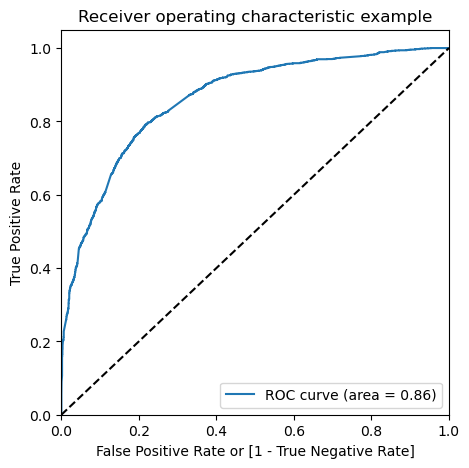

In [84]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [85]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.148794,0,1,1,0,0,0,0,0,0,0,0
1,0,0.907860,1,1,1,1,1,1,1,1,1,1,1
2,0,0.216934,0,1,1,1,0,0,0,0,0,0,0
3,1,0.670543,1,1,1,1,1,1,1,1,0,0,0
4,0,0.727846,1,1,1,1,1,1,1,1,1,0,0


In [86]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted,
                                   y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1

    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.477920  1.000000  0.000000
0.1   0.1  0.556153  0.990619  0.158437
0.2   0.2  0.704102  0.938086  0.489910
0.3   0.3  0.755212  0.905253  0.617862
0.4   0.4  0.783457  0.800188  0.768141
0.5   0.5  0.782112  0.733114  0.826964
0.6   0.6  0.770455  0.666510  0.865608
0.7   0.7  0.739072  0.545966  0.915844
0.8   0.8  0.713517  0.449812  0.954916
0.9   0.9  0.650527  0.287523  0.982825


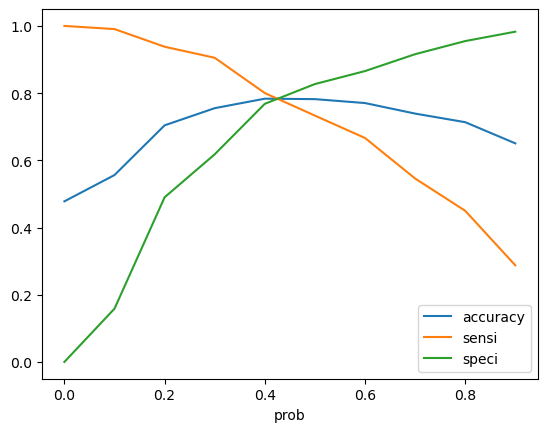

In [87]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(
    lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.148794,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.907860,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.216934,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.670543,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.727846,1,1,1,1,1,1,1,1,1,0,0,1


In [89]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted,
                       y_train_pred_final.final_predicted)

0.7865949338713293

In [90]:
# Creating confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1827,  502],
       [ 450, 1682]], dtype=int64)

In [91]:
# Let's evaluate the other metrics as well

TP = confusion2[1, 1]  # true positive
TN = confusion2[0, 0]  # true negatives
FP = confusion2[0, 1]  # false positives
FN = confusion2[1, 0]  # false negatives

In [92]:
# Calculate Sensitivity

TP/(TP+FN)

0.7889305816135085

In [93]:

# Calculate Specificity

TN/(TN+FP)

0.7844568484328038

## Step 4: Making Predictions on the Test Set



In [94]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [95]:
# Select the columns in X_train for X_test as well

X_test = X_test[cols]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
2828,0.043478,0.297535,0,0,0,0,0,0,0,1,1,0,0,0,0
6562,0.026087,0.014085,0,0,0,0,0,0,0,1,0,1,0,0,0
7468,0.043478,0.538732,0,0,0,0,0,0,0,1,0,1,0,0,0
6337,0.017391,0.211268,0,0,0,0,0,0,0,0,0,1,0,0,0
8566,0.034783,0.298415,0,0,0,0,0,0,0,0,0,1,0,0,0


In [96]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[cols])

In [97]:
# Check X_test_sm

X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
2828,1.0,0.043478,0.297535,0,0,0,0,0,0,0,1,1,0,0,0,0
6562,1.0,0.026087,0.014085,0,0,0,0,0,0,0,1,0,1,0,0,0
7468,1.0,0.043478,0.538732,0,0,0,0,0,0,0,1,0,1,0,0,0
6337,1.0,0.017391,0.211268,0,0,0,0,0,0,0,0,0,1,0,0,0
8566,1.0,0.034783,0.298415,0,0,0,0,0,0,0,0,0,1,0,0,0


In [98]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'Last Notable Activity_Had a Phone Conversation'],axis=1,inplace=True)

In [99]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [100]:
y_test_pred[:10]

2828    0.619918
6562    0.288903
7468    0.807833
6337    0.240224
8566    0.330782
338     0.130241
3940    0.493768
448     0.985069
7146    0.063675
4428    0.992262
dtype: float64

In [101]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [102]:
# checking the head
y_pred_1.head()

,0
2828,0.619918
6562,0.288903
7468,0.807833
6337,0.240224
8566,0.330782


In [103]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [104]:
# Remove index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [105]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [106]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.619918
1,0,0.288903
2,0,0.807833
3,0,0.240224
4,1,0.330782


In [107]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [108]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.619918
1,0,0.288903
2,0,0.807833
3,0,0.240224
4,1,0.330782


In [109]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(
    lambda x: 1 if x > 0.42 else 0)

In [110]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.619918,1
1,0,0.288903,0
2,0,0.807833,1
3,0,0.240224,0
4,1,0.330782,0


In [111]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7986401673640168

In [112]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'],
                                      y_pred_final.final_predicted)
confusion2

array([[788, 191],
       [194, 739]], dtype=int64)

In [113]:
TP = confusion2[1, 1]  # true positive
TN = confusion2[0, 0]  # true negatives
FP = confusion2[0, 1]  # false positives
FN = confusion2[1, 0]  # false negatives

In [114]:
# Calculate sensitivity
TP / float(TP+FN)

0.7920685959271169

In [115]:
# Calculate specificity
TN / float(TN+FP)

0.804902962206333

### Precision and Recall

In [116]:
confusion2[1, 1] / (confusion2[0, 1] + confusion2[1, 1])

0.7946236559139785

In [117]:
# Recall
confusion2[1, 1] / (confusion2[1, 0] + confusion2[1, 1])

0.7920685959271169